In [1]:
import sys

sys.version

'3.9.2 (default, Feb 28 2021, 17:03:44) \n[GCC 10.2.1 20210110]'

In [2]:
!pip list| grep scikit

scikit-learn              1.5.0


### Typical ML Workflow

1. Asking the right question
2. Preparing data
3. Selecting the algorithm
4. Training the model
5. Testing the model

### Asking the right question.

Question should have "direction" and "validation" criteria.

"Predict if a person will develop diabetes?" 

#### Solution Goals.

1. Scope (including data sources) (age, race, weight, genetic factors, etc.,)
Modified question *"Using Pima Indian Diabetes data, predict if a person will develop diabetes."

2. Target performance required (Binary result true/false, 70% or greater accuracy.)
Modified question *"Using Pima Indian Diabetes data, predict with 70% or greater accuracy, predict if a person will develop diabetes."

3. Context & usage (likelyhood? or anything else)
Modified question *"Using Pima Indian Diabetes data, predict with 70% or greater accuracy, which people are likely to develop diabetes."

4. How solution will be created
Modified question *"Use the Machine Learning Workflow to process and transofrm Pima Indian Diabetes data to create a prediction model. This model must predict which people are likely to develop diabetes, with 70% or greater accuracy."*

### Get, Clean, Explore, make Tidy data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("./data/pima-data.csv")

In [5]:
df.shape

(768, 10)

In [6]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

### Feature vs. Column

## nulls, no data, unused data & duplicate data
## ID columns, duplicated features such as AreaInSQFT and AreaInMeters, correlated Features 

In [7]:
df.isnull().values.any()

False

In [8]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    # how to add legends?
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

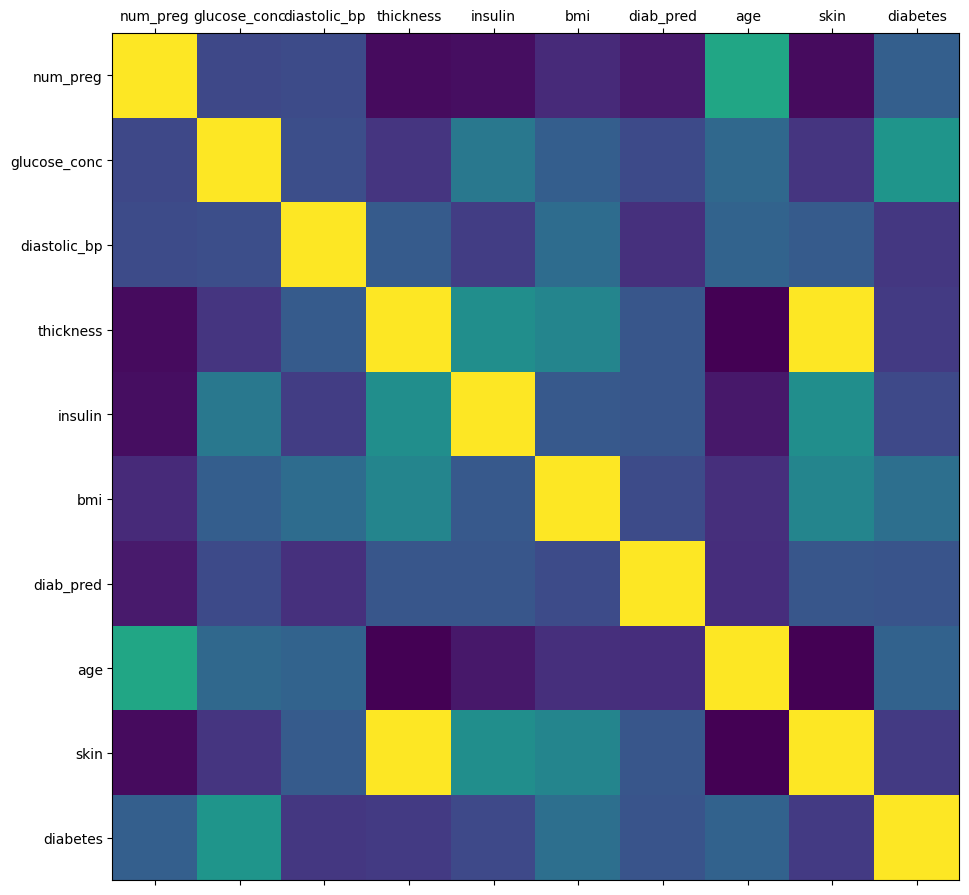

In [9]:
plot_corr(df)

In [10]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
del df['skin']

In [12]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


### change True/False to numeric values.

In [13]:
diabetes_map = { True: 1, False: 0}

In [14]:
df['diabetes'] = df['diabetes'].map(diabetes_map)
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
(f"({num_true * 100/(num_true + num_false):0.2f}%, {num_false * 100/(num_true + num_false):0.2f}%)")

'(34.90%, 65.10%)'

In [16]:
df.shape

(768, 9)

|Learning Type|Result Type|Complexity|Basic vs. Enhanced|
|--------------|-----------|----------|------------------|
|Supervised|Binary (True/False)|simple. not Ensemble algos| basic.|


Ensemble
1. Container alogs
2. Multiple child alogs
3. Boost performance

| Naive Bayes | Logistic Regression | Decision Tree |
|-----------|-------------------|-------------|
| yes|no |no |

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
feature_columns = list(df.columns)
feature_columns.remove('diabetes')
predicated_class_names = 'diabetes'

(feature_columns, predicated_class_names)

(['num_preg',
  'glucose_conc',
  'diastolic_bp',
  'thickness',
  'insulin',
  'bmi',
  'diab_pred',
  'age'],
 'diabetes')

In [19]:
X = df[feature_columns].values
y = df[predicated_class_names].values

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [20]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((537, 8), (231, 8), (537,), (231,))

training_true vs. training_false and testing_true vs. testing_false

missing values

In [21]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df["glucose_conc"] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df["diastolic_bp"] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df["thickness"] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df["insulin"] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df["bmi"] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df["diab_pred"] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df["age"] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [22]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [23]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [24]:
def print_performance(y, predictedX):
    print("Confusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y, predictedX)))
    print("")

    print("Classification Report:")
    print("{0}".format(metrics.classification_report(y, predictedX)))
    print("")

In [25]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

print_performance(y_train, nb_predict_train)

Accuracy: 0.7542
Confusion Matrix:
[[293  56]
 [ 76 112]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       349
           1       0.67      0.60      0.63       188

    accuracy                           0.75       537
   macro avg       0.73      0.72      0.72       537
weighted avg       0.75      0.75      0.75       537




In [26]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

print_performance(y_test, nb_predict_test)

Accuracy: 0.7359
Confusion Matrix:
[[118  33]
 [ 28  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231




1. Adjust current algo
2. Get more data/improve the data
3. Improve training (adjust hyper parameters of current algo)
4. Switch algo

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [28]:
rf_predict_train = rf_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

print_performance(y_train, rf_predict_train)

Accuracy: 1.0000
Confusion Matrix:
[[349   0]
 [  0 188]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537




In [29]:
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

print_performance(y_test, rf_predict_test)

Accuracy: 0.7403
Confusion Matrix:
[[119  32]
 [ 28  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231




In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=400)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(max_iter=400, random_state=42)

In [31]:
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print_performance(y_test, lr_predict_test)

Accuracy: 0.7359
Confusion Matrix:
[[123  28]
 [ 33  47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231




In [32]:
from sklearn.linear_model import LogisticRegressionCV

lrcv_model = LogisticRegressionCV(random_state=42, n_jobs=-1, cv=10, Cs=3, refit=False, class_weight="balanced", solver='lbfgs', max_iter=400)
lrcv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=400,
                     n_jobs=-1, random_state=42, refit=False)

In [33]:
lrcv_predict_train = lrcv_model.predict(X_train)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lrcv_predict_train)))

print_performance(y_train, lrcv_predict_train)

Accuracy: 0.7654
Confusion Matrix:
[[275  74]
 [ 52 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       349
           1       0.65      0.72      0.68       188

    accuracy                           0.77       537
   macro avg       0.74      0.76      0.75       537
weighted avg       0.77      0.77      0.77       537




In [34]:
lrcv_predict_test = lrcv_model.predict(X_test)

from sklearn import metrics

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lrcv_predict_test)))

print_performance(y_test, lrcv_predict_test)

Accuracy: 0.7013
Confusion Matrix:
[[109  42]
 [ 27  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231




In [41]:
Xp = X_test[0]

(lrcv_model.predict(Xp.reshape(1, -1)), y_test[0])

(array([0]), 0)

In [40]:
(Xp.shape, Xp.reshape(1, -1).shape)

((8,), (1, 8))

In [4]:
l1 = [1, 2, 3, 4, 5]

mean = sum(l1)/len(l1)

l2 = [(mean-i)**2 for i in l1]

import math

covar = math.sqrt(sum(l2)/len(l2)-1)

(mean, covar)

(3.0, 1.0)

In [11]:
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchasedAmts = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchasedAmts)

(slope, intercept, r_value ** 2, p_value, std_err)

(-3.0143085402642895,
 100.04360662562898,
 0.9893003156372002,
 0.0,
 0.0099230194522375)

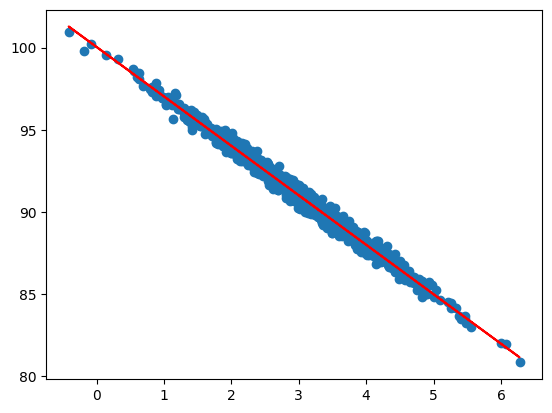

In [12]:
def predict(x):
    return intercept + slope * x

fitLine = predict(pageSpeeds)

import matplotlib.pyplot as plt

plt.scatter(pageSpeeds, purchasedAmts)
plt.plot(pageSpeeds, fitLine, c="r")
plt.show()

In [20]:
np.random.seed(42)

X = np.random.normal(3.0, 1.0, 1000)
y = np.random.normal(50.0, 30.0, 1000)/X

X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [37]:
p4 = np.poly1d(np.polyfit(X_train, y_train, 8)) # 1 is perfect.

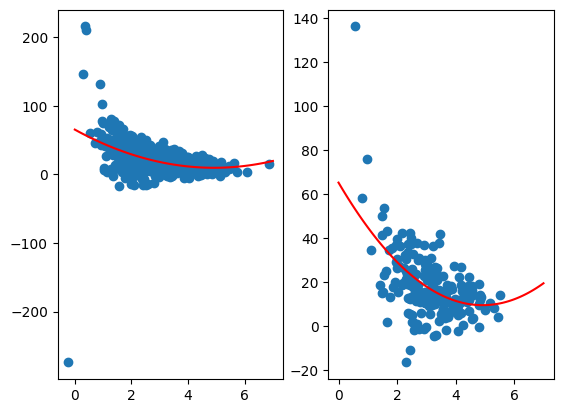

In [38]:
xp = np.linspace(0, 7, 100)

fig, ax = plt.subplots(nrows=1, ncols=2)

plt1 = ax[0]
plt1.scatter(X_train, y_train)
plt1.plot(xp, p4(xp), c="r")

plt2 = ax[1]
plt2.scatter(X_test, y_test)
plt2.plot(xp, p4(xp), c="r")

plt.show()

In [39]:
from sklearn.metrics import r2_score

(r2_score(y_test, p4(X_test)), r2_score(y_train, p4(X_train)))

(0.3208229474776544, 0.17909760653611473)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

data = pd.DataFrame({'message':['free stuff! hurry now!!', 'Hi Cindy, let\'s meet at NYTC.'], 'class': ['spam', 'ham']})
                    
vec = CountVectorizer()
counts = vec.fit_transform(data['message'].values)

classifier = MultinomialNB()

targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [51]:
examples = ['Cancel the meeting', 'Free now!', 'Greetings Gent! This is to inform you...']

examples_counts = vec.transform(examples)
preds = classifier.predict(examples_counts)
preds

array(['ham', 'spam', 'ham'], dtype='<U4')

In [56]:
from sklearn import tree

df = pd.read_csv('./data/past-hires.csv', header=0)

In [ ]:
df.head()

In [58]:
d = { 'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Emploed?'] = df['Emploed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)

d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

In [59]:
df.head()

,Years Experience,Emploed?,Previous Employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,3,0,1,1,1
1,20,1,1,2,0,0,0


In [60]:
features = list(df.columns[:6])

X = df[features]
y = df['Hired']

treec = tree.DecisionTreeClassifier()
treec = treec.fit(X, y)

In [76]:
newResume = df[1:][features]

In [77]:
treec.predict(newResume)

array([0])

In [65]:
from sklearn.ensemble import RandomForestClassifier

rtreec = RandomForestClassifier(n_estimators = 4)
rtreec = rtreec.fit(X, y)

In [78]:
rtreec.predict(newResume)

array([0])

In [82]:
from sklearn import datasets, svm

iris = datasets.load_iris()

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

svmc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

svmc.score(X_test, y_test)

0.9666666666666667

In [90]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svmc, iris.data, iris.target, cv=5)

In [93]:
(scores, scores.mean())

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

In [94]:
svmc.predict(iris.data[:1])

array([0])

In [99]:
svmcpoly = svm.SVC(kernel='poly', C=1, degree=2).fit(X_train, y_train)
scores = cross_val_score(svmc, iris.data, iris.target, cv=5)

In [100]:
(scores, scores.mean())

(array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]),
 0.9800000000000001)

### Data Cleaning
1. Outliers
2. Missing Data
3. Malicious Data
4. Erroneous Data
5. Irrelevant Data
6. Inconsistant Data
7. Formatting
8. Duplicate Observations
9. Redundant Features

### Data Normalization 
1. scales normalizing
2. label encoding to numerics

### Data Imputing
1. mean (watch for outliers)
2. median
3. missing category
4. drop observations if many features are missing
5. use KNN or Deep Learning(specially for categorical data) or use Regression (e.g., MICE - Multiple Imputation by Chained Equations)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

wine_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', \
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315',\
              'Proline']
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names = wine_names)
wine_df = pd.DataFrame(wine_data)
wine_df.Class = wine_df.Class - 1 # what is this?

In [19]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wine_df.Class

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

Y = wine_df.loc[:,'Class'].values
X = wine_df.loc[:,'Alcohol':'Proline'].values

#we split the dataset into a test and training set
train_x, test_x, train_y, test_y = train_test_split(X,Y , test_size=0.3, random_state=0)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(train_x, train_y)

In [6]:
ftest_score = clf.score(test_x, test_y)
ftest_score

0.8703703703703703

### Feature & Tree Bagging

In [7]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, max_features = 'sqrt',verbose = 1, bootstrap = False)
RF_clf.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

In [8]:
ftest_score = RF_clf.score(test_x, test_y)
ftest_score

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


0.9629629629629629

### Gradient Descent Boosting

In [13]:
!pip list | grep xgboost

xgboost                   2.1.0


In [11]:
!pip install xgboost

     |████████████████████████████████| 4.2 MB 7.5 MB/s eta 0:00:01


In [14]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

dtest = xgb.DMatrix(test_x, test_y, feature_names=wine_names[1:14])
dtrain = xgb.DMatrix(train_x, train_y,feature_names=wine_names[1:14])
param = {'max_depth': 2,
         'learning_rate': 0.3,
         'verbosity': 1,
         'objective': 'multi:softmax',
         'num_class': 3,
         'eval_metric': 'merror'}
evallist = [(dtrain, 'train')]

In [15]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	train-merror:0.01613
[1]	train-merror:0.01613
[2]	train-merror:0.01613
[3]	train-merror:0.01613
[4]	train-merror:0.00806
[5]	train-merror:0.00806
[6]	train-merror:0.00806
[7]	train-merror:0.00000
[8]	train-merror:0.00000
[9]	train-merror:0.00000


/usr/local/lib/python3.9/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


In [17]:
ypred = bst.predict(dtest)
accuracy_score(test_y,ypred)

0.9444444444444444